# Домашнее задание 3 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.


### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [ ]:
import numpy as np
import numbers

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [ ]:
def max_element(arr):
    if arr is None:
        raise TypeError("Переданный аргумент \"arr\" имеет значение \"None\"")
    elif not isinstance(arr, np.ndarray):
        raise TypeError("Переданный аргумент \"arr\" не является numpy-массивом")
    else:
        zeroth_elems_indexes = np.where(arr[ : -1] == 0)[0]
        if len(zeroth_elems_indexes) == 0:
            return None
        else:
            non_zeroth_elems = arr[zeroth_elems_indexes + 1]
            return np.max(non_zeroth_elems)

X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max_elem = max_element(X)
print(max_elem)

5


**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [ ]:
def nearest_value(X, v):
    if X is None:
        raise TypeError("Переданный аргумент \"X\" имеет значение \"None\"")
    elif v is None:
        raise TypeError("Переданный аргумент \"v\" имеет значение \"None\"")
    elif not isinstance(X, np.ndarray):
        raise TypeError("Переданный аргумент \"X\" не является numpy-массивом")
    elif not isinstance(v, numbers.Number):
        raise TypeError("Переданный аргумент \"v\" не является числом")
    elif len(X.shape) != 2:
        raise TypeError("Переданный аргумент \"X\" не является numpy-матрицей")
    elif X.shape[0] * X.shape[1] == 0:
        raise TypeError("Переданный аргумент \"X\" является пустой numpy-матрицей")
    else:
        X_copy = X.copy()
        flat_index = np.argmin(np.abs(X_copy - v))

        return X[flat_index // X.shape[1], flat_index % X.shape[1]]

nearest_value = nearest_value(np.arange(0, 10).reshape((2, 5)), 3.6).item()
print(nearest_value)

4


**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [ ]:
def scale(X):
    if X is None:
        raise TypeError("Переданный аргумент \"X\" имеет значение \"None\"")
    elif not isinstance(X, np.ndarray):
        raise TypeError("Переданный аргумент \"X\" не является numpy-массивом")
    elif len(X.shape) != 2:
        raise TypeError("Переданный аргумент \"X\" не является numpy-матрицей")
    elif X.shape[0] * X.shape[1] == 0:
        raise TypeError("Переданный аргумент \"X\" является пустой numpy-матрицей")
    else:
        X_copy                 = X.copy()
        mean_values            = np.mean(X_copy, axis = 0)
        std_values             = np.std(X_copy, axis = 0)
        std_values_indexes     = np.where(std_values == 0)
        X_copy                 = (X_copy - mean_values) / std_values if len(std_values_indexes[0]) == 0 else None

        return X_copy

random_matrix = np.random.randint(low = 0, high = 1000, size = (4, 4))
print("Матрица: \n", random_matrix)
print()

random_matrix_scaled = scale(random_matrix)
print("Масштабированная матрица: \n", random_matrix_scaled)

Матрица: 
 [[953  84 614 125]
 [394 547 178 872]
 [631 183 530 967]
 [403 480 857 987]]

Масштабированная матрица: 
 [[ 1.57366904 -1.23045209  0.28448438 -1.71913583]
 [-0.88525757  1.1482507  -1.50663748  0.37665277]
 [ 0.15725693 -0.72183097 -0.06059415  0.64318546]
 [-0.84566841  0.80403237  1.28274725  0.6992976 ]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [ ]:
def get_stats(X):
    if X is None:
        raise TypeError("Переданный аргумент \"X\" имеет значение \"None\"")
    elif not isinstance(X, np.ndarray):
        raise TypeError("Переданный аргумент \"X\" не является numpy-массивом")
    elif len(X.shape) != 2:
        raise TypeError("Переданный аргумент \"X\" не является numpy-матрицей")
    elif X.shape[0] * X.shape[1] == 0:
        raise TypeError("Переданный аргумент \"X\" является пустой numpy-матрицей")
    else:
        characteristics = {
            "matrix":                     None,
            "det":                        None,
            "trace":                      None,
            "min_elem":                   None,
            "max_elem":                   None,
            "frobenius_norm":             None,
            "eigvals":                    None,
            "inverted_matrix":            None,
        }

        X_copy = X.copy()
        characteristics["matrix"] = X_copy

        det_X = None
        if X_copy.shape[0] == X_copy.shape[1]:
            det_X = np.linalg.det(X_copy).item()
        characteristics["det"] = det_X

        trace_X = None
        if X_copy.shape[0] == X_copy.shape[1]:
            trace_X = np.trace(X_copy).item()
        characteristics["trace"] = trace_X

        characteristics["min_elem"] = np.min(X_copy)
        characteristics["max_elem"] = np.max(X_copy)

        characteristics["frobenius_norm"] = np.linalg.norm(X_copy, ord = "fro").item()

        eigvals, eigvecs = np.linalg.eig(X_copy)
        characteristics["eigvals"] = eigvals

        inv_X = None
        if characteristics["det"] is not None and characteristics["det"] != 0.0:
            inv_X = np.linalg.inv(X_copy)
        characteristics["inverted_matrix"] = inv_X

        return characteristics

normal_matrix = np.random.normal(loc = 10.0, scale = 1.0, size = (5, 5))
for (key, value) in get_stats(normal_matrix).items():
    print(f"{key}:")
    print(f"{value}")
    print()

matrix:
[[ 8.72594719 11.06604582 10.31264815 10.58996873 10.69575484]
 [ 9.7328555  10.39259583 11.37113778 10.23663594 10.04802794]
 [ 9.60289803  9.95533266 10.07711481  9.52621169 10.45911349]
 [ 8.96294994  9.83791155 11.42574821  9.34536264  9.57228096]
 [ 9.53282296 10.81139432  9.18266151  9.71088034 10.2549345 ]]

det:
21.82794126899501

trace:
48.79595496711933

min_elem:
8.725947191253972

max_elem:
11.425748214060143

frobenius_norm:
50.403156706462376

eigvals:
[50.27649824+0.j         -0.1283381 +1.07856102j -0.1283381 -1.07856102j
 -0.69229993+0.j         -0.53156714+0.j        ]

inverted_matrix:
[[-0.65352274  0.61319349  0.10014    -0.36656907  0.32082703]
 [-0.11449654 -0.81195174 -0.98394766  0.95003899  1.03172973]
 [-0.04021925 -0.24758057 -0.08497994  0.58778107 -0.17744813]
 [ 0.45576302  1.64083395 -0.04851755 -1.46985781 -0.6615871 ]
 [ 0.3326441  -1.04609426  1.06628857  0.20472199 -0.50305391]]



**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [ ]:
NUMBER_OF_EXPERMINETS = 100
PERCENTS = 95

ROWS = 10
COLS = 10

A, B, matrix_prod = None, None, None
max_elems = np.zeros(NUMBER_OF_EXPERMINETS)
for exp_num in range(0, NUMBER_OF_EXPERMINETS, 1):
    A = np.random.standard_normal(size = (ROWS, COLS))
    B = np.random.standard_normal(size = (ROWS, COLS))
    matrix_prod = A @ B
    max_elems[exp_num] = np.max(matrix_prod)
mean_max_elems = np.mean(max_elems)
quantile_95 = np.percentile(max_elems, PERCENTS)

print("Первая матрица:\n", A, "\n")
print("Вторая матрица:\n", B, "\n")
print("Произведение 2 матриц:\n", matrix_prod, "\n")
print(f"Среднее значение максимальныъ элементов - {mean_max_elems:.5f}")
print(f"{PERCENTS}%-квантиль равна {quantile_95:.5f}")

Первая матрица:
 [[-1.9281711   0.31482625 -0.74975451 -0.92531796  1.60665639 -1.01613953
   0.46604016  0.51784685  0.37687238 -0.05153075]
 [ 1.114985   -0.89059646 -0.49561864 -1.08847803 -1.14341165 -1.33084026
  -1.00135797  1.12064399 -0.39373425 -0.02426464]
 [-0.21581432 -0.10061575 -1.0571649  -1.74849322 -1.22621321  0.16872385
  -0.69869541 -0.83033076 -0.30689721  0.69883346]
 [-0.75180319 -0.07204623 -0.02066683  0.29477252 -0.76195739  0.67886649
   1.08766713  0.30003672 -1.60737206  1.15915203]
 [-0.81331701  0.17709666  0.04050904 -0.98764329  0.84011738  1.09503432
  -1.17521689 -0.1530032  -0.11839424 -0.44664049]
 [ 1.45106278  0.08296764  0.97216441  1.10144033  0.42560629 -0.17446089
   1.07078383 -0.25708641  2.66844401  0.53635014]
 [ 1.27618254  0.49407796 -0.76949928 -0.63221913 -0.06184864 -0.46698925
   0.710513   -0.91948664 -0.36090382  0.66934126]
 [-1.95731084 -0.78538223  0.83243379 -1.23524895  1.6640845   0.18891683
  -0.55471044  0.81735537 -0.06390

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
df_original = pd.read_csv("2008.csv")
df_copy = df_original.copy()

**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [ ]:
cancellation_reasons = {
    "A": "Carrier",
    "B": "Weather",
    "C": "NAS",
    "D": "Security",
}

cancelled_flights              = df_copy[df_copy["Cancelled"] == 1]

cancellation_counts            = df_copy["CancellationCode"].value_counts()
cancellation_counts.name       = "Cancellation Code Number By Category"

max_number_cancellation        = cancellation_counts.max()
most_frequent_cancellation     = cancellation_counts[cancellation_counts == max_number_cancellation]

if most_frequent_cancellation is not None:
    print(f"Самая частая причина - это\n{most_frequent_cancellation}")

Самая частая причина - это
CancellationCode
A    563
Name: Cancellation Code Number By Category, dtype: int64


**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояния, пройденное самолётом.

In [ ]:
distances = {
    "min":    df_copy["Distance"].min().item(),
    "mean":   df_copy["Distance"].mean().item(),
    "max":    df_copy["Distance"].max().item(),
}

print("Расстояние в милях:")
print("{")
for (key, value) in distances.items():
    print(f"\t{key}:\t\t{value:.4f}")
print("}")

Расстояние в милях:
{
	min:		31.0000
	mean:		724.5083
	max:		4962.0000
}


**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [ ]:
min_distance                         = df_copy["Distance"].min()
min_distance_flights                 = df_copy[df_copy["Distance"] == min_distance]

print(f"Минимальное расстояние: {min_distance}")
print(f"Рейсы с минимальным расстоянием:\n{min_distance_flights}")
print(f"Количество рейсов с найденным минимальным расстоянием в {min_distance} миль: {len(min_distance_flights.index)}\n")
print()

print("Анализ тех же рейсов в другие дни для выяснения причины\n")

grouped_flights = min_distance_flights.groupby(["UniqueCarrier", "FlightNum"])
for (carrier, flight_num), group in grouped_flights:
    print(f"Рейс {carrier}{flight_num} с маршрутом {group.iloc[0]["Origin"]} -> {group.iloc[0]["Dest"]}")

    same_flight = df_copy[
        (df_copy["UniqueCarrier"] == carrier) &
        (df_copy["FlightNum"] == flight_num)
    ]

    print(f"Число рейсов из исходного фрейма данных с таким же номером: {len(same_flight.index)}")

    other_days = same_flight[same_flight["Distance"] != min_distance]
    if not other_days.empty:
        print("Другие рейсы с другими расстояниями, отличными от минимального:")
        print(other_days[["Year", "Month", "DayofMonth", "Origin", "Dest", "Distance"]])
        print()

Минимальное расстояние: 31
Рейсы с минимальным расстоянием:
       Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
1116   2008     12          30          2   1123.0        1007   1148.0   
6958   2008     12          26          5      NaN        1007      NaN   
17349  2008      8          18          1      NaN        1737      NaN   
27534  2008      3          11          2   1611.0        1537   1630.0   
46082  2008      8           9          6   1103.0        1036   1139.0   
48112  2008      2          28          4   1535.0        1537   1603.0   

       CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
1116         1033            AS         65  ...    6.0      6.0          0   
6958         1033            AS         65  ...    NaN      NaN          1   
17349        1801            AS         64  ...    NaN      NaN          1   
27534        1605            AS         64  ...    4.0      5.0          0   
46082        1100       

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [ ]:
origin_counts = df_copy["Origin"].value_counts()
if not origin_counts.empty:
    max_count = origin_counts.max()
    max_origin_counts = origin_counts[origin_counts == max_count]
    max_origin_counts.name = "Airports with maximum flight number"

    print(max_origin_counts)
    print()

Origin
ATL    4134
Name: Airports with maximum flight number, dtype: int64



**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [ ]:
non_cancelled_flights        = df_copy[df_copy["Cancelled"] == 0]

group_by_origin              = non_cancelled_flights.groupby("Origin")
mean_airtime_by_origin       = group_by_origin["AirTime"].mean()
mean_airtime_by_origin.name  = "Среднее время полёта для каждого аэропорта"

print(f"{mean_airtime_by_origin}")
print()

max_mean_airtime_airport     = mean_airtime_by_origin.idxmax()
max_mean_airtime_by_origin   = mean_airtime_by_origin.max()

print(f"Аэропорт с наибольшим средним временем полёта {max_mean_airtime_by_origin} миль - это {max_mean_airtime_airport}")
print()

Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: Среднее время полёта для каждого аэропорта, Length: 296, dtype: float64

Аэропорт с наибольшим средним временем полёта 205.2 миль - это SJU



**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [ ]:
FLIGHT_NUMBER                       = 1000

filtered_airports                   = df_copy.groupby("Origin").filter(lambda group : len(group) >= FLIGHT_NUMBER)
sum_flights_number                  = (filtered_airports.groupby("Origin").count())["FlightNum"]
delayed_flights_number              = (filtered_airports[filtered_airports["DepDelay"] > 0.0].groupby("Origin").count())["FlightNum"]

depdelay_ratios = []
indexes = delayed_flights_number.index
for index in indexes:
    depdelay_ratios.append((delayed_flights_number[index] / sum_flights_number[index]).item())

delayed_ratios_by_airports          = pd.Series(data = depdelay_ratios, index = indexes)
max_depdelay_ratio_airport          = delayed_ratios_by_airports.idxmax()
max_depdelay_ratio_value            = delayed_ratios_by_airports.max()
overall_flights                     = sum_flights_number[max_depdelay_ratio_airport]

print(f"Аэропорт с максимальной долей {max_depdelay_ratio_value:.4f} задержанных рейсов, у которого не менее {FLIGHT_NUMBER} полётов - это " + \
      f"{max_depdelay_ratio_airport}")

print(f"Общее число полётов у этого аэропорта равно {overall_flights}")

Аэропорт с максимальной долей 0.5112 задержанных рейсов, у которого не менее 1000 полётов - это EWR
Общее число полётов у этого аэропорта равно 1389


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов.

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [ ]:
df_original     = pd.read_csv("2008.csv")
df_copy         = df_original.copy()

In [ ]:
MISS_NUMBER = 1

# 1
print("Имеются ли в данных пропущенные значения?\n", df_copy.isnull().any().any())
print()

# 2
print("Сколько всего пропущенных элементов в таблице \"объект-признак\"?\n", df_copy.isnull().sum().sum())
print()

# 3
print(f"Сколько объектов имеют хотя бы {MISS_NUMBER} пропуск?\n", ((df_copy.isnull().sum()) >= MISS_NUMBER).sum())
print()

# 4
print(f"Сколько признаков имеют хотя бы {MISS_NUMBER} пропущенное значение?\n", df_copy.isnull().any(axis = 0).sum())
print()

Имеются ли в данных пропущенные значения?
 True

Сколько всего пропущенных элементов в таблице "объект-признак"?
 355215

Сколько объектов имеют хотя бы 1 пропуск?
 16

Сколько признаков имеют хотя бы 1 пропущенное значение?
 16



Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [ ]:
# # DepDelay - это целевое значение. DepDelay имеет пропущенное значение => все характеристики рейса (AirTime, DepTime, ArrTime, CarrierDelay
# #                                                                                                   WeatherDelay, NASDelay, TqxiIn, TaxiOut и т. д.)
# #                                                                         имеют пропущенное значение

# print(f"Число пропущенных (None / NaN / NaT) значений в столбце \"DepDelay\" - {df_copy["DepDelay"].isnull().sum()}")

# missed_objects = df_copy[df_copy["DepDelay"].isnull()]
# print("Количество объектов (строк в исходном фрейме данных), имеющих пропущенное (None / NaN / NaT) значение в столбце \"DepDelay\" - " + \
#       f"{len(missed_objects)}")

# print("Сами эти пропущенные объекты:\n")
# print(missed_objects)
# print()

# print("Пропущенные значения в признаках, имеющих столбец \"DepDelay\" с пропущенным значением")
# print(missed_objects.isnull().sum().sort_values(ascending = False))
# print()

# # Ищем признаки, которые не имеют смысла для оставшихся рейсов
# X_transformed                   = df_copy.dropna(subset = ["DepDelay"])
# X_transformed                   = X_transformed[X_transformed["DepDelay"] != 0.0]

# X_transformed                   = X_transformed.drop(columns = columns_to_drop)
# depdelay_vector                 = X_transformed["DepDelay"]
# W                               = X_transformed.drop(columns = ["DepDelay"])

# print(f"Длина колонки признака \"DepDelay\" - {depdelay_vector.shape}")
# print(f"Размер фрейма данных без признака \"DepDelay\" - {W.shape}")

# print("depdelay_vector:\n", depdelay_vector)
# print("W:\n", W)
# print()

# Имеются ли пропущенные значения в целевой переменной?
print(f"Пропущенных значений: {df_copy["DepDelay"].isnull().sum()} из {len(df_copy["DepDelay"])} - общего числа значений в столбце \"DepDelay\"" + \
      "включая пропущенные")

# Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш
# взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

missed_objects = df_copy[df_copy["DepDelay"].isnull()]
print("missed_objects:\n", missed_objects)
print("missed_objects[\"DepDelay\"]:\n", missed_objects["DepDelay"])
print()

# Столбцы
#                  DepTime, ArrTime, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay  LateAircraftDelay
# имеют значение NaN

# Проверим это
print(f"Количество пропущенных значений в исходном фрейме данных:\n {df_copy.isnull().sum()}")
print()

# Действительно, столбцы
#                  DepTime, ArrTime, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay  LateAircraftDelay
# имеют почти столько же пропущенных значений, сколько и столбец
#                                                           DepDelay
# в исходном фрейме данных, причём там, где значение столбца
#                                                           DepDelay
# пропущено, там значение столбцов
#                  DepTime, ArrTime, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay  LateAircraftDelay
# тоже пропущено.

# Исключите из выборки объекты с пропущенным значением целевой переменной и со значением целевой переменной, равным 0
df_copy = df_copy.dropna(subset = ["DepDelay"])
df_copy = df_copy[df_copy["DepDelay"] != 0.0]

print("df_copy:\n", df_copy)
print()

print("df_copy:\n", df_copy["TailNum"], df_copy["Year"])
print()

Пропущенных значений: 1399 из 70000 - общего числа значений в столбце "DepDelay"включая пропущенные
missed_objects:
        Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
11     2008      3           6          4      NaN        1605      NaN   
78     2008      1          19          6      NaN         750      NaN   
103    2008      7          24          4      NaN        1230      NaN   
112    2008      2           4          1      NaN         620      NaN   
128    2008      1          21          1      NaN        1838      NaN   
...     ...    ...         ...        ...      ...         ...      ...   
69818  2008      6           9          1      NaN        1645      NaN   
69836  2008      1          25          5      NaN         938      NaN   
69884  2008     12          26          5      NaN        1935      NaN   
69918  2008      3           1          6      NaN         600      NaN   
69949  2008      1          21          1      NaN        

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать.

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [ ]:
signs_to_transform = [
    "DepTime",
    "CRSDepTime",
    "ArrTime",
    "CRSArrTime",
]

def transform_sign(sign):

    def convert(value):
        if pd.isnull(value):
            return pd.NA, pd.NA

        try:
            value = int(value)
        except (ValueError, TypeError):
            return pd.NA, pd.NA

        hours       = value // 100
        minutes     = value % 100
        if 0 <= hours <= 23 and 0 <= minutes <= 59:
            return hours, minutes
        else:
            return pd.NA, pd.NA

    results    = sign.apply(convert)
    hours      = results.apply(lambda x : x[0])
    minutes    = results.apply(lambda x : x[1])

    return hours, minutes

for sign in signs_to_transform:
    if sign in df_copy.columns:
        hours, minutes              = transform_sign(df_copy[sign])
        df_copy[sign + "_Hour"]     = hours
        df_copy[sign + "_Minute"]   = minutes
        df_copy                     = df_copy.drop(columns = [sign])

print("df_copy:\n", df_copy)
print()

df_copy:
        Year  Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum TailNum  \
0      2008      6          18          3            WN        242  N699SW   
1      2008      6           4          3            XE       2380  N15980   
2      2008      8           3          7            WN       1769  N464WN   
3      2008      1          23          3            OO       3802  N465SW   
4      2008      5           4          7            WN        399  N489WN   
...     ...    ...         ...        ...           ...        ...     ...   
69994  2008      1          26          6            OH       5218  N655CA   
69995  2008      5          12          1            DL        794  N988DL   
69996  2008      5          11          7            OO       6159  N776SK   
69998  2008      2          18          1            NW        641  N318US   
69999  2008     12           6          6            WN        510  N786SW   

       ActualElapsedTime  CRSElapsedTime  AirTime  ..

**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [ ]:
import scipy

only_numeric_columns          = df_copy.select_dtypes(include = [np.number]).columns
only_numeric_columns          = [col for col in only_numeric_columns if col != "DepDelay"]

correlations = {}
for col in only_numeric_columns:
    valid_data = df_copy[["DepDelay", col]].dropna()
    if len(valid_data) > 1:
        corr, _                = scipy.stats.pearsonr(valid_data["DepDelay"], valid_data[col])
        correlations[col]      = abs(corr)

sorted_correlations            = sorted(correlations.items(), key = lambda x : abs(x[1]), reverse = True)
related_signs                  = [item[0] for item in sorted_correlations[0 : 5]]

related_signs.append("TailNum")
related_signs.append("Year")

print("related_signs:\n", related_signs)
df_copy = df_copy.drop(columns = related_signs)

print("df_copy:\n", df_copy)
print

X = df_copy

related_signs:
 ['Year', 'ArrDelay', 'LateAircraftDelay', 'CarrierDelay', 'WeatherDelay', 'TailNum', 'Year']
df_copy:
        Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum  \
0          6          18          3            WN        242   
1          6           4          3            XE       2380   
2          8           3          7            WN       1769   
3          1          23          3            OO       3802   
4          5           4          7            WN        399   
...      ...         ...        ...           ...        ...   
69994      1          26          6            OH       5218   
69995      5          12          1            DL        794   
69996      5          11          7            OO       6159   
69998      2          18          1            NW        641   
69999     12           6          6            WN        510   

       ActualElapsedTime  CRSElapsedTime  AirTime  DepDelay Origin  ...  \
0                   57.0            6

C:\Users\Alexadrietz\AppData\Local\Temp\ipykernel_3972\4040007305.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _                = scipy.stats.pearsonr(valid_data["DepDelay"], valid_data[col])


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

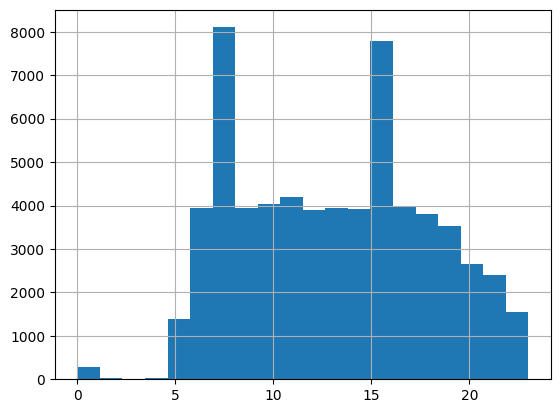

In [ ]:
X["DepTime_Hour"].hist(bins = 20)

<Axes: >

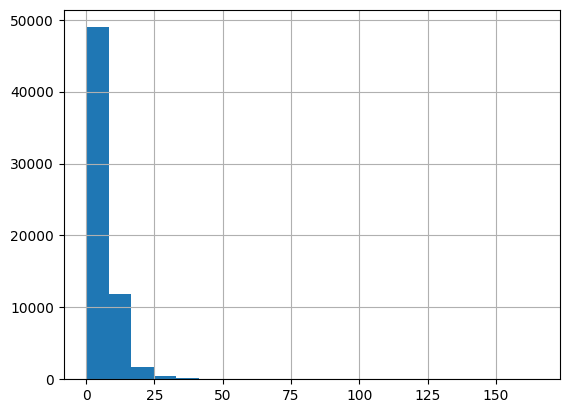

In [ ]:
X["TaxiIn"].hist(bins = 20)

<Axes: >

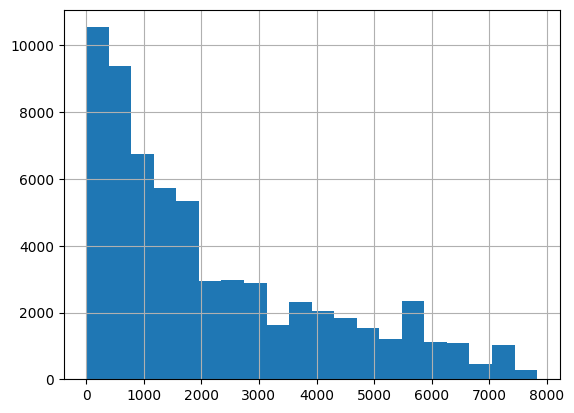

In [ ]:
X["FlightNum"].hist(bins = 20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [ ]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):

    # 1. Идентифицируем типы признаков
    numeric_signs            = X.select_dtypes(include = [np.number]).columns.tolist()
    categorical_signs        = X.select_dtypes(include = ["object", "category"]).columns.tolist()

    # 2. Обработка пропущенных значений
    for col in numeric_signs:
        X[col] = X[col].fillna(0.0)

    for col in categorical_signs:
        X[col] = X[col].fillna("nan")

    # 3. Масштабирование вещественных признаков
    if numeric_signs:
        scaler                     = StandardScaler()
        scaled_numeric             = scaler.fit_transform(X[numeric_signs])

        scaled_df                  = pd.DataFrame(scaled_numeric,
                                                  columns = [f"{col}_scaled" for col in numeric_signs],
                                                  index = X.index
                                     )
    else:
        scaled_df = pd.DataFrame(index = X.index)

    # 4. One-hot-кодирование категориальных признаков
    if categorical_signs:
        categorical_dummies = pd.get_dummies(X[categorical_signs], prefix = categorical_signs, prefix_sep = "_")
    else:
        categorical_dummies = pd.DataFrame(index = X.index)

    # 5. Собираем финальный DataFrame
    final_df = pd.concat([scaled_df, categorical_dummies], axis = 1)

    print(f"Преобразовано: {df_original.shape} → {final_df.shape}")

    return final_df

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [ ]:
# X = transform_data(X)
print("X:\n", X)
print()

X:
        Month  DayofMonth  DayOfWeek UniqueCarrier  FlightNum  \
0          6          18          3            WN        242   
1          6           4          3            XE       2380   
2          8           3          7            WN       1769   
3          1          23          3            OO       3802   
4          5           4          7            WN        399   
...      ...         ...        ...           ...        ...   
69994      1          26          6            OH       5218   
69995      5          12          1            DL        794   
69996      5          11          7            OO       6159   
69998      2          18          1            NW        641   
69999     12           6          6            WN        510   

       ActualElapsedTime  CRSElapsedTime  AirTime  DepDelay Origin  ...  \
0                   57.0            65.0     46.0      16.0    MDW  ...   
1                  124.0           138.0    108.0      16.0    IAH  ...   
2 

**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)).

In [ ]:
y = df_copy["DepDelay"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3,
    random_state = 32,
)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

SAMPLES = 2000

# 3. Берем подмножество для обучения (1000 объектов)
X_train_subset   = X_train.iloc[ : SAMPLES]
y_train_subset   = y_train.iloc[ : SAMPLES]

# 4. Обучаем модель
lr = LinearRegression()
lr.fit(X_train_subset, y_train_subset)

# 5. Предсказания
y_train_pred     = lr.predict(X_train_subset)
y_test_pred      = lr.predict(X_test)

# 6. Метрики
mse_train        = mean_squared_error(y_train_subset, y_train_pred)
r2_train         = r2_score(y_train_subset, y_train_pred)
mse_test         = mean_squared_error(y_test, y_test_pred)
r2_test          = r2_score(y_test, y_test_pred)

print(f"MSE на обучающей подвыборке (1000 объектов): {mse_train:.2f}")
print(f"R^2 на обучающей подвыборке (1000 объектов): {r2_train:.4f}")
print(f"MSE на тестовой выборке: {mse_test:.2f}")
print(f"R^2 на тестовой выборке: {r2_test:.4f}")

ValueError: could not convert string to float: 'WN'

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [ ]:
# Your code here

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [ ]:
# Your code here
# ...

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?